# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [61]:
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install folium
!pip install sklearn
!pip install pickle
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 79.1 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 13.8 MB/s eta 0:00:00

[notice] A new release of pip

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [40]:
print(f'DF with {df.duplicated().sum()} duplicated row in the dataset.')

DF with 1 duplicated row in the dataset.


<AxesSubplot:>

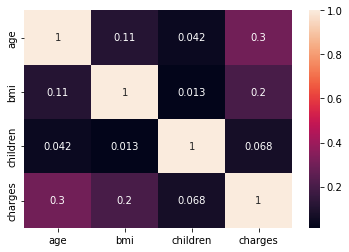

In [41]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

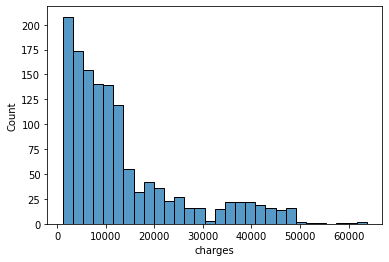

In [42]:
sns.histplot(data=df, x="charges")

<AxesSubplot:xlabel='charges', ylabel='Count'>

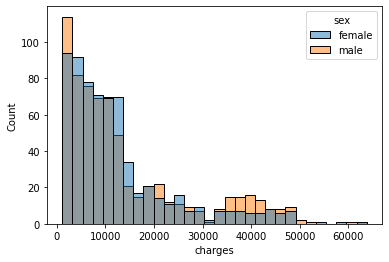

In [43]:
sns.histplot(data=df, x="charges", hue='sex')

In [44]:
df.groupby(['sex'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


<AxesSubplot:xlabel='charges', ylabel='Count'>

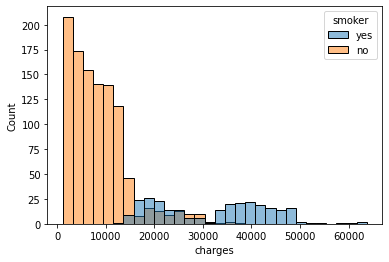

In [45]:
sns.histplot(data=df, x="charges", hue='smoker')

In [46]:
df.groupby(['smoker'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<AxesSubplot:xlabel='charges', ylabel='Count'>

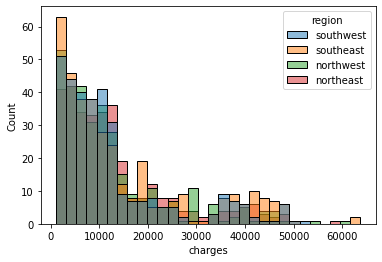

In [47]:
sns.histplot(data=df, x="charges", hue='region')

In [48]:
df.groupby(['region'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


<AxesSubplot:xlabel='bmi', ylabel='charges'>

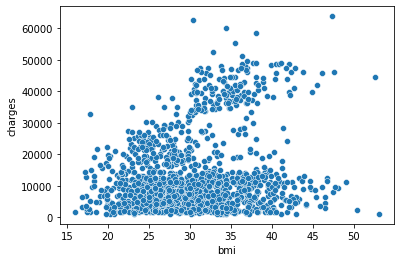

In [49]:
sns.scatterplot(data=df, x="bmi", y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

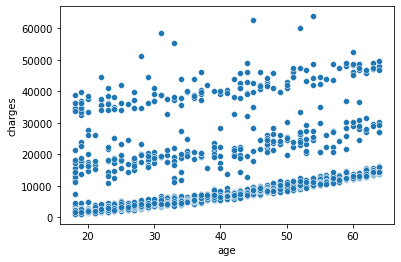

In [50]:
sns.scatterplot(data=df, x="age", y='charges')

<AxesSubplot:xlabel='age', ylabel='charges'>

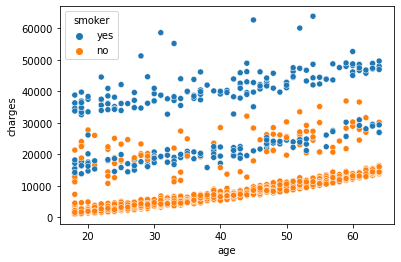

In [51]:
sns.scatterplot(data=df, x="age", y='charges', hue='smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

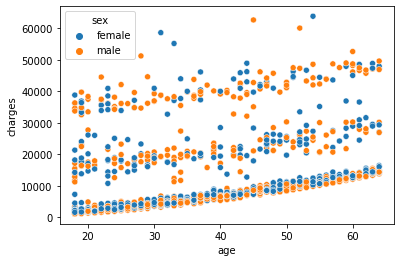

In [52]:
sns.scatterplot(data=df, x="age", y='charges', hue='sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

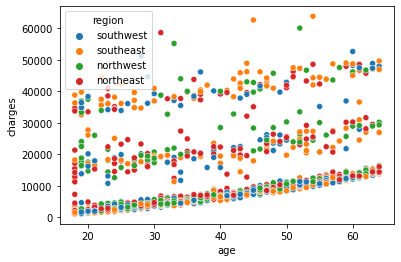

In [53]:
sns.scatterplot(data=df, x="age", y='charges', hue='region')

<AxesSubplot:xlabel='age2', ylabel='charges'>

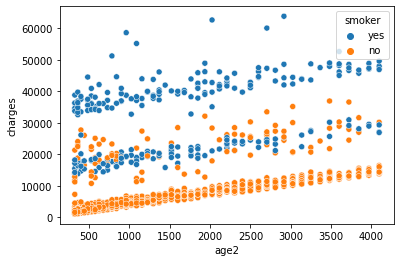

In [54]:
df_age2 = df
df_age2['age2'] = df['age'] * df['age']

sns.scatterplot(data=df_age2, x="age2", y='charges', hue='smoker')

In [55]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,age2,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,361,0,1,0,0,1
1,18,33.770,1,1725.55230,324,1,0,0,1,0
2,28,33.000,3,4449.46200,784,1,0,0,1,0
3,33,22.705,0,21984.47061,1089,1,0,1,0,0
4,32,28.880,0,3866.85520,1024,1,0,1,0,0


In [56]:
X = df.drop('charges', axis=1)
y = df['charges']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

print('Intercept:',model_simple.intercept_)
print('Columns:', model_simple.feature_names_in_)
print('Slope:', model_simple.coef_)

Intercept: -6851.386122297656
Columns: ['age' 'bmi' 'children' 'age2' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']
Slope: [-5.32352432e+01  3.40040482e+02  5.84595396e+02  3.97139491e+00
  9.06461969e+01  2.36080257e+04 -4.89239268e+02 -9.62772964e+02
 -8.59552396e+02]


In [67]:
y_pred = model_simple.predict(X_test)
y_pred

array([ 8524.81256796,  6097.84894319, 38269.16664298,  9212.79966113,
       27634.34261602, 10332.97402033,   737.59001402, 18499.03328824,
         650.90062075, 11186.36070223, 28015.70543032,  8814.31983188,
        4628.35525355, 37993.66384437, 40901.87641173, 36565.63488709,
       14794.7517633 , 35104.89978   ,  8263.22228922, 30463.38238274,
        4580.89292797,  9688.2119325 ,  3139.1422869 ,  7434.90506809,
       11241.82428349, 12967.02127477, 15327.38950671,  6208.1867876 ,
        9633.63643284,  2853.80482543,  8815.45133179, 13349.81617012,
        4676.49758561,  3174.16654663,  4466.06418476, 12421.06023103,
        2484.17066277,  8094.86103726, 33027.59171054, 31668.9922074 ,
        5359.40020086,  4745.86511357, 14520.22697384, 12090.99782953,
        8170.21118341, 12998.96268162,  5897.57187445,  3457.07213242,
       34923.54885456,  8666.04999466, 16937.95651108,  3176.5690498 ,
       11553.26891919,  2451.31525217, 13457.20174645, 12593.87587769,
      

In [71]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', metrics.mean_squared_error(y_test, y_pred, squared=False))

MAE 4069.6836749715058
MSE 33399571.715172157
RMSE 5779.236257082086


In [65]:
filename='../models/simple_model.sav'
pickle.dump(model_simple, open(filename, 'wb'))

In [66]:
X_int = sm.add_constant(X_train) 
modelo_alt = sm.OLS(y_train, X_int)
results = modelo_alt.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     301.1
Date:                Sun, 24 Jul 2022   Prob (F-statistic):          6.67e-268
Time:                        22:05:37   Log-Likelihood:                -9487.6
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     926   BIC:                         1.904e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6851.3861   2085.747     -3.285      0.001   -1.09e+04   -2758.047
age                -53.2352     98.044     -0.543      0.587    -245.649     139.178
bmi                340.0405     35.211      9.657      0.000     270.937     409.144
children           584.5954    173.334      3.373      0.001     244.422     924.769
age2                 3.9714      1.225      3.243      0.001       1.568       6.375
sex_male            90.6462    402.848      0.225      0.822    -699.955     881.247
smoker_yes        2.361e+04    496.110     47.586      0.000    2.26e+04    2.46e+04
region_northwest  -489.2393    567.144     -0.863      0.389   -1602.276     623.797
region_southeast  -962.7730    576.919     -1.669      0.095   -2094.992     169.447
region_southwest  -859.5524    575.852     -1.493      0.136   -1989.680     270.575
==============================================================================
Omnibus:                      232.306   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.524
Skew:                           1.296   Prob(JB):                    3.21e-127
Kurtosis:                       5.867   Cond. No.                     2.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Optimization

In [78]:
model2 = LinearRegression(fit_intercept=False)
y_pred2 = model2.fit(X_train, y_train).predict(X_test)

# Performance metrics
print('MAE', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE', metrics.mean_squared_error(y_test, y_pred2,squared=False))

MAE 4015.7581564555962
MSE 33774497.52490372
RMSE 5811.583048094875


In [73]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [76]:
param_grid = {'polynomialfeatures__degree': np.arange(4), # polynomial up to 4
              'linearregression__fit_intercept': [True, False], # with and without intercept
              'linearregression__normalize': [True, False]} # normalize and not normalize

grid = GridSearchCV(PolynomialRegression(), param_grid) # 5 folds
grid.fit(X_train, y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3])})

In [77]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [81]:
model3 = grid.best_estimator_
y_pred3 = model3.fit(X_train, y_train).predict(X_test)

print('MAE', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE', metrics.mean_squared_error(y_test, y_pred3,squared=False))

MAE 2668.3534879239232
MSE 20390409.740385573
RMSE 4515.574131866907


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [82]:
filename='../models/model_second.sav'
pickle.dump(model2, open(filename, 'wb'))

In [83]:
filename='../models/model_final.sav'
pickle.dump(model3, open(filename, 'wb'))